<a href="https://colab.research.google.com/github/Abhishekjha111/Hello-world/blob/master/Universal_function_approximator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# example of fitting a neural net on x vs x^2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
# define the dataset
x = asarray([i for i in range(-50,51)])
y = asarray([i**11 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 -4882812500000000000 4882812500000000000


In [0]:
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [0]:
# design the neural network model
model = Sequential()
model.add(Dense(20, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=1)
# make predictions for the input data
yhat = model.predict(x)

Epoch 1/500
101/101 [==============================] - 0s 954us/step - loss: 0.7509
Epoch 2/500
101/101 [==============================] - 0s 147us/step - loss: 0.3357
Epoch 3/500
101/101 [==============================] - 0s 135us/step - loss: 0.0941
Epoch 4/500
101/101 [==============================] - 0s 136us/step - loss: 0.0223
Epoch 5/500
101/101 [==============================] - 0s 135us/step - loss: 0.0235
Epoch 6/500
101/101 [==============================] - 0s 139us/step - loss: 0.0184
Epoch 7/500
101/101 [==============================] - 0s 134us/step - loss: 0.0146
Epoch 8/500
101/101 [==============================] - 0s 134us/step - loss: 0.0134
Epoch 9/500
101/101 [==============================] - 0s 137us/step - loss: 0.0125
Epoch 10/500
101/101 [==============================] - 0s 134us/step - loss: 0.0114
Epoch 11/500
101/101 [==============================] - 0s 134us/step - loss: 0.0109
Epoch 12/500
101/101 [==============================] - 0s 142us/step - lo

In [0]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

MSE: 465853441965463253405227454820253696.000


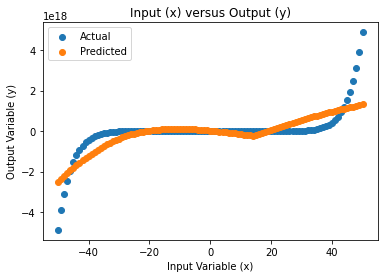

In [0]:
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()